In [1]:
import sys,os,datetime
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function

In [2]:
import  cv2 as cv
cv.__version__
#import PIL.ImageOps, PIL.Image

'3.2.0'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense


Using TensorFlow backend.


In [5]:
import keras.optimizers

In [6]:
#import keras.applications
##c,h,w = 1,299,299
##model=keras.applications.inception_v3.InceptionV3(include_top=True, weights='imagenet', input_tensor=None, input_shape=(h,w,c))
#c,h,w = 1,201,201
#model=keras.applications.inception_v3.InceptionV3(include_top=False, weights=None, input_tensor=None, input_shape=(h,w,c))

In [7]:
#
# Kritchevsky and Co 2012
#

c,h,w = 1,201,201
model = Sequential()
model.add(Convolution2D(96, 11, 11, subsample=(4,4), init='he_normal', input_shape=(h,w,c))) # ?????
#model.add(Convolution2D(256, 11, 11, subsample=(4,4), init='he_normal', input_shape=(h,w,c))) # ?????
model.add(Activation('relu'))
'''
model.add(Convolution2D(64, 3,3,activation='relu'))
'''
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(256, 5, 5,activation='relu',init='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(384, 3, 3,activation='relu',init='he_normal'))
model.add(Convolution2D(384, 3, 3,activation='relu',init='he_normal'))
model.add(Convolution2D(256, 3, 3,activation='relu',init='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors


model.add(Dense(4096,init='he_normal')) #,activation='relu',name='Dense1'))
model.add(Activation('relu'))
model.add(Dropout(0.75))

model.add(Dense(4096,init='he_normal')) #,activation='relu',name='Dense1'))
model.add(Activation('relu'))
model.add(Dropout(0.75))

model.add(Dense(6,activation='sigmoid'))
model.add(Dropout(0.25))
#model.add(Activation('sigmoid'))
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='poisson', #'categorical_crossentropy',
              optimizer=sgd, #'rmsprop',
              metrics=['accuracy'])

In [94]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=10,
        #samplewise_center=True,
        ##featurewise_center=True,
        ##featurewise_std_normalization=True,
        ##samplewise_std_normalization=True,
        ##zca_whitening=True,
        vertical_flip=True,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(
        #samplewise_center=True,
        ##featurewise_center=True,
        ##featurewise_std_normalization=True,
        #samplewise_std_normalization=True,
        ##zca_whitening=True,
        rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        '../Keras/FormatOK/Train',  # this is the target directory
        target_size=(h,w),  # ???? all images will be resized to 150x150
        color_mode='grayscale',
        batch_size=32,
        #save_to_dir='../Keras/Temp',
        #shuffle=False,
        save_prefix='train',
        classes=['Object1','Object2','Unknown1','Unknown2','Unknown3','Unknown4'],
        class_mode='categorical')
        #class_mode='sparse')
        #class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        '../Keras/FormatOK/Test',
        target_size=(h,w),
        color_mode='grayscale',
        batch_size=32,
        #save_to_dir='../Keras/Temp',
        #shuffle=False,
        save_prefix='valid',
        classes=['Object1','Object2','Unknown1','Unknown2','Unknown3','Unknown4'],
        class_mode='categorical')
        #class_mode='sparse')

Found 12715 images belonging to 6 classes.
Found 850 images belonging to 6 classes.


In [16]:
model.load_weights('../Keras/first_try-11.h5')

In [14]:
4096+4096

8192

In [99]:
print('time.begin :',datetime.datetime.now())
start = 0+808
steps = 64
model.fit_generator(
        train_generator,
        samples_per_epoch=12715,
        nb_epoch=start+steps, #50,
        verbose=2,
        validation_data=validation_generator,
        initial_epoch=start,
        nb_val_samples=2048) #00)
print('time.end   :',datetime.datetime.now())

time.begin : 2017-03-06 18:49:51.566783
Epoch 809/872
35s - loss: 0.7988 - acc: 0.7384 - val_loss: 0.3847 - val_acc: 0.8465
Epoch 810/872
35s - loss: 0.8168 - acc: 0.7317 - val_loss: 0.3785 - val_acc: 0.8392
Epoch 811/872
35s - loss: 0.8024 - acc: 0.7370 - val_loss: 0.3677 - val_acc: 0.8357
Epoch 812/872
35s - loss: 0.7978 - acc: 0.7385 - val_loss: 0.3642 - val_acc: 0.8504
Epoch 813/872
35s - loss: 0.8163 - acc: 0.7328 - val_loss: 0.4023 - val_acc: 0.8396
Epoch 814/872
35s - loss: 0.7997 - acc: 0.7397 - val_loss: 0.3579 - val_acc: 0.8426
Epoch 815/872
35s - loss: 0.8233 - acc: 0.7269 - val_loss: 0.3706 - val_acc: 0.8420
Epoch 816/872
35s - loss: 0.7988 - acc: 0.7400 - val_loss: 0.3903 - val_acc: 0.8402
Epoch 817/872
36s - loss: 0.8018 - acc: 0.7387 - val_loss: 0.3778 - val_acc: 0.8440
Epoch 818/872
35s - loss: 0.8122 - acc: 0.7346 - val_loss: 0.3926 - val_acc: 0.8431
Epoch 819/872
36s - loss: 0.7815 - acc: 0.7449 - val_loss: 0.3682 - val_acc: 0.8440
Epoch 820/872
35s - loss: 0.8196 - a

In [100]:
print(model.evaluate_generator(train_generator,val_samples=5000)) # ??????
print(model.evaluate_generator(validation_generator,val_samples=5000)) # ??????

[0.1878313408829845, 0.97561463122126724]
[0.39821058104364132, 0.83972821764046435]


In [102]:
model.save_weights('../Keras/first_try-11.h5')  # always save your weights after training or during training

In [34]:
pathFind  = '../Data/Train1'
pathFind  = '../Data/Test1'
pathFind1 = '../Data/Train1'
pathFind2 = '../Data/Test1'
pathSave = '../Keras/Find/Train1'
ii       = 0

for rmvFile in os.listdir(pathSave) :
    os.remove(os.path.join(pathSave,rmvFile))

xList    = os.listdir(pathFind); 
xList    = os.listdir(pathFind1)+os.listdir(pathFind2); 
xList.sort();
xList = xList #[0:20]

print('list size =',len(xList))

iijj  = 0

for nameFile in xList :
    imgName = os.path.join(pathFind,nameFile)
    try : img0 = cv.imread(imgName,-1)
    ###try : img0 = PIL.Image.open(imgName); 
    except : continue
    if (img0 is None) : continue
    ###img0 = PIL.ImageOps.grayscale(img0); 
    ###img = img.resize((h,w))
    ##img  = np.asarray(img0); #print(img.shape)
    ##img0 = np.asarray(img0); #print(img.shape)
        
    img  = cv.GaussianBlur(img0,(3,3),0)
    if img.max()>255 : img = np.uint8((np.float32(img)/256.0))
    img = cv.equalizeHist(img)

    li,li0,x,y,sx,sy,ii=[],[],0,0,h,w,ii+1

    for x in range(0,img.shape[1],sx) :
        if (x+sx)<img.shape[1] :
            for y in range(0,img.shape[0],sy) :
                if (y+sy)<img.shape[0] :
                    imgXY = img [y:(y+sy),x:(x+sx)];
                    imgXY0= img0[y:(y+sy),x:(x+sx)];
                    li0.append(imgXY0)
                    imgXY = cv.resize(imgXY,(h,w))
                    imgXY=imgXY.reshape(imgXY.shape+(1,))
                    li.append(imgXY)
    
    
    y= img.shape[0]
    for x in range(0,img.shape[1],sx) :
        xy = min(img.shape[1],x+sx)
        if (xy-x)>=2 :
                    imgXY = img [(y-sy):y,x:xy];
                    imgXY0= img0[(y-sy):y,x:xy];
                    li0.append(imgXY0)
                    imgXY = cv.resize(imgXY,(h,w))
                    imgXY=imgXY.reshape(imgXY.shape+(1,))
                    li.append(imgXY)
    x= img.shape[1]
    for y in range(0,img.shape[0],sx) :
        xy = min(img.shape[1],y+sy)
        if (xy-y)>=2 :
                    imgXY = img [y:xy,(x-sx):x];
                    imgXY0= img0[y:xy,(x-sx):x];
                    li0.append(imgXY0)
                    imgXY = cv.resize(imgXY,(h,w))
                    imgXY=imgXY.reshape(imgXY.shape+(1,))
                    li.append(imgXY)
                    #print(ii,nameFile,imgXY.shape)
    
    
    jj = 0
    predict = model.predict(np.array(li))
    for xli0 in range(len(li0)) :
        ### ?? if ((1.0-(1.0-predict[xli0,0])*(1.0-predict[xli0,1]))>0.999) :
        if (predict[xli0,0]>0.999) :
            nameFileX = os.path.splitext(nameFile)[0]+'-'+str(10000+xli0)+'.png'; #os.path.splitext(nameFile)[1]
            ## ??? cv.imwrite(os.path.join(pathSave,nameFileX),li0[xli0])
            cv.imwrite(os.path.join(pathSave,nameFileX),li0[xli0])
            jj +=1
            
    iijj += jj
            
    print(datetime.datetime.now(),ii,'-->',jj,'\t',nameFile,)
    
print(datetime.datetime.now(),ii,'--> All -->',iijj)


list size = 2001
2017-03-11 14:43:49.618351 1 --> 11 	 1001.tif
2017-03-11 14:43:49.960595 2 --> 2 	 1002.tif
2017-03-11 14:43:50.336825 3 --> 37 	 1003.tif
2017-03-11 14:43:50.668882 4 --> 6 	 1004.tif
2017-03-11 14:43:50.970235 5 --> 13 	 1005.tif
2017-03-11 14:43:51.276545 6 --> 4 	 1006.tif
2017-03-11 14:43:51.643255 7 --> 14 	 1007.tif
2017-03-11 14:43:51.929196 8 --> 10 	 1008.tif
2017-03-11 14:43:52.296276 9 --> 40 	 1009.tif
2017-03-11 14:43:52.643022 10 --> 10 	 1010.tif
2017-03-11 14:43:53.051625 11 --> 50 	 1011.tif
2017-03-11 14:43:53.410522 12 --> 13 	 1012.tif
2017-03-11 14:43:54.648420 13 --> 18 	 1013.tif
2017-03-11 14:43:54.967861 14 --> 13 	 1014.tif
2017-03-11 14:43:55.303172 15 --> 10 	 1015.tif
2017-03-11 14:43:55.633499 16 --> 7 	 1016.tif
2017-03-11 14:43:55.984264 17 --> 8 	 1017.tif
2017-03-11 14:43:56.284338 18 --> 14 	 1018.tif
2017-03-11 14:43:56.619870 19 --> 7 	 1019.tif
2017-03-11 14:43:56.911520 20 --> 0 	 1020.tif
2017-03-11 14:43:57.355677 21 --> 9 	 1

1001-10010.png


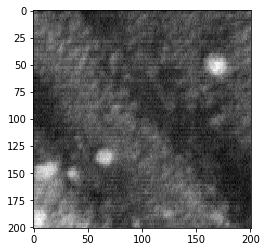

1001-10048.png


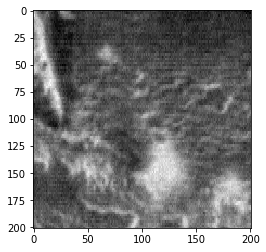

1001-10050.png


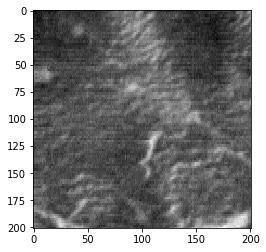

1001-10073.png


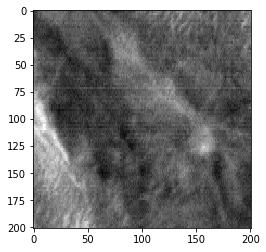

1001-10080.png


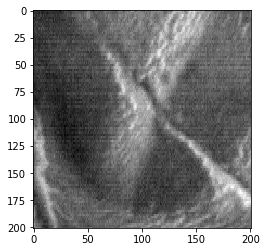

1001-10082.png


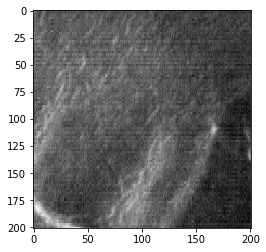

1001-10085.png


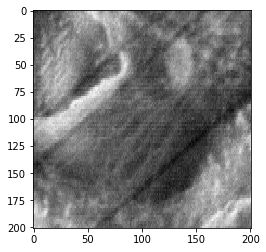

1001-10103.png


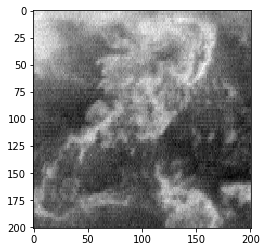

1001-10161.png


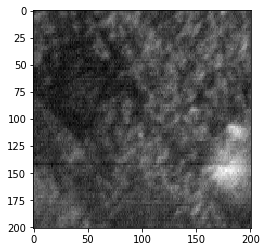

1001-10199.png


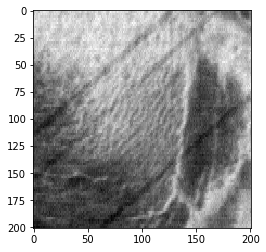

1001-10210.png


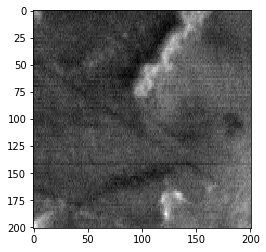

1002-10093.png


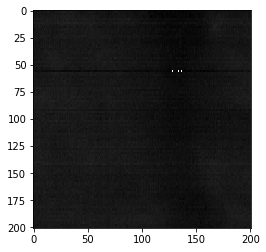

1002-10126.png


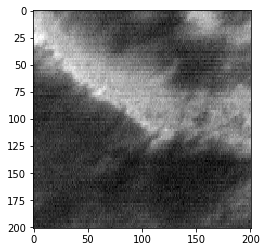

1003-10000.png


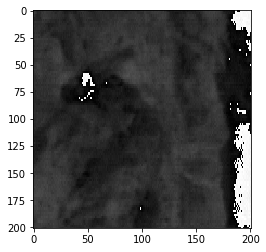

1003-10010.png


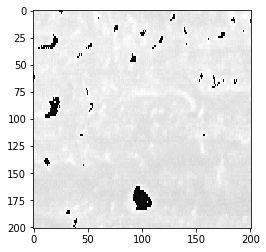

1003-10029.png


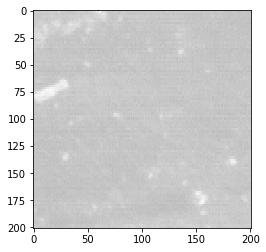

1003-10040.png


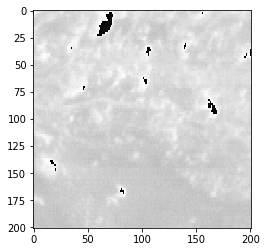

1003-10057.png


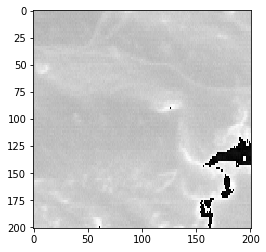

1003-10060.png


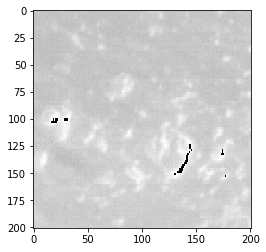

1003-10074.png


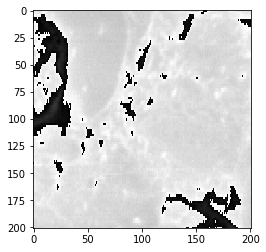

In [33]:
for rmvFile in os.listdir(pathSave)[0:20] :
    imgName = os.path.join(pathSave,rmvFile)
    try : img0 = cv.imread(imgName,-1); 
    except : continue;

    print(rmvFile)
    plt.imshow(img0,'gray')
    plt.show()


In [25]:
%magic

In [67]:
# transform train and test sets on 0..255 format
for path in ['../Keras/FormatOK/Train/Object1',
             '../Keras/FormatOK/Train/Object2',
             '../Keras/FormatOK/Train/Unknown1',
             '../Keras/FormatOK/Train/Unknown2',
             '../Keras/FormatOK/Train/Unknown3',
             '../Keras/FormatOK/Train/Unknown4'
             ] :
    print(path,len(os.listdir(path)))
    #print(os.listdir(path))
    for file in os.listdir(path) :
        imgName = os.path.join(path,file)
        img = cv.imread(imgName,-1)
        if True or img.max()>255 :
            if img.max()>255 : img = np.uint8((np.float32(img)/256.0))
            img = cv.GaussianBlur(img,(3,3),0)
            img = cv.equalizeHist(img)
            cv.imwrite(imgName,img)

../Keras/FormatOK/Train/Object1 2070
../Keras/FormatOK/Train/Object2 256
../Keras/FormatOK/Train/Unknown1 4070
../Keras/FormatOK/Train/Unknown2 1303
../Keras/FormatOK/Train/Unknown3 4403
../Keras/FormatOK/Train/Unknown4 613


../Keras/FormatOK/Train/Object1 2070
0.0 1.0 0.0837281 0.268334 ../Keras/FormatOK/Train/Object1 (2070, 201, 201, 1)
[797.5308837890625, 68.92565155029297, 3.723517674747434e-11, 110.3059310913086, 59.14105987548828, 4.0]
[0.7669277191162109, 0.06628081202507019, 3.580637644566044e-14, 0.10607323050498962, 0.0568716786801815, 0.003846510546281934]


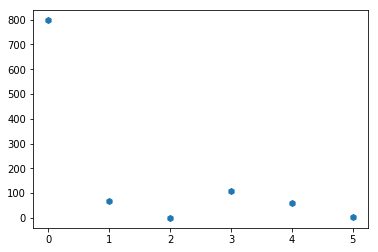

../Keras/FormatOK/Train/Object2 256
0.0 1.0 0.128881 0.326421 ../Keras/FormatOK/Train/Object2 (256, 201, 201, 1)
[45.73844528198242, 114.12947845458984, 3.6475413800474143e-09, 10.27083683013916, 26.82185935974121, 0.9999997615814209]
[0.23104821145534515, 0.5765261650085449, 1.8425590914139534e-11, 0.05188323184847832, 0.13549087941646576, 0.005051508545875549]


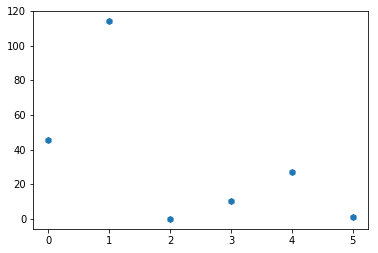

../Keras/FormatOK/Train/Unknown1 3082
0.0 1.0 0.0616317 0.224411 ../Keras/FormatOK/Train/Unknown1 (3082, 201, 201, 1)
[71.80187225341797, 120.7262191772461, 72.78226470947266, 179.95204162597656, 673.4215698242188, 21.008028030395508]
[0.0630011186003685, 0.10592880845069885, 0.06386134773492813, 0.15789532661437988, 0.5908803343772888, 0.01843307539820671]


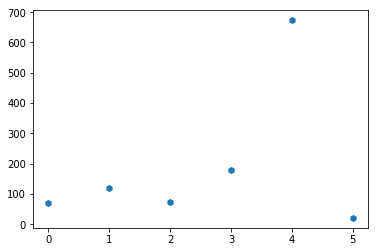

../Keras/FormatOK/Train/Unknown2 1303
0.0 1.0 0.13409 0.332938 ../Keras/FormatOK/Train/Unknown2 (1303, 201, 201, 1)
[208.08920288085938, 35.05323791503906, 5.99993896484375, 506.35406494140625, 269.8326110839844, 22.988975524902344]
[0.19849814474582672, 0.03343759477138519, 0.005723395384848118, 0.48301565647125244, 0.25739574432373047, 0.021929388865828514]


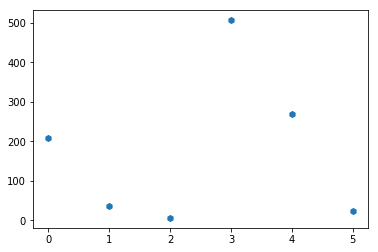

../Keras/FormatOK/Train/Unknown3 5391
0.0 1.0 0.0482963 0.201077 ../Keras/FormatOK/Train/Unknown3 (5391, 201, 201, 1)
[139.65115356445312, 270.7382507324219, 12.483699798583984, 207.03196716308594, 922.0410766601562, 10.244283676147461]
[0.0893944501876831, 0.17330682277679443, 0.007991150952875614, 0.1325267106294632, 0.5902232527732849, 0.006557640619575977]


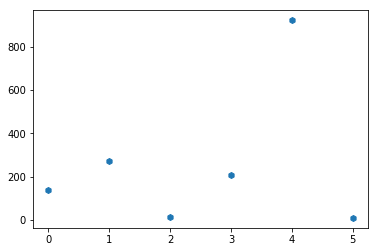

../Keras/FormatOK/Train/Unknown4 613
0.0 1.0 0.13125 0.326552 ../Keras/FormatOK/Train/Unknown4 (613, 201, 201, 1)
[138.5234832763672, 66.93550872802734, 2.9426181316375732, 102.92778015136719, 127.73763275146484, 43.67143249511719]
[0.28695347905158997, 0.13865791261196136, 0.006095677614212036, 0.21321645379066467, 0.2646104395389557, 0.09046602994203568]


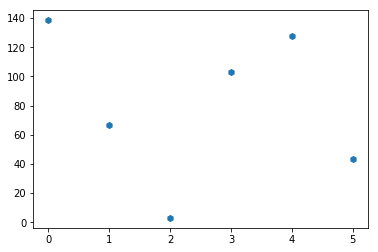

In [101]:
# Verify results on Train and Test sets (200x200)
for path in ['../Keras/FormatOK/Train/Object1',
             '../Keras/FormatOK/Train/Object2',
             '../Keras/FormatOK/Train/Unknown1',
             '../Keras/FormatOK/Train/Unknown2',
             '../Keras/FormatOK/Train/Unknown3',
             '../Keras/FormatOK/Train/Unknown4'
            ] :
    print(path,len(os.listdir(path)))
    #print(os.listdir(path))
    imgs = []
    for file in os.listdir(path) :
        imgName = os.path.join(path,file)
        #print(imgName)
        ##img = cv.imread(imgName,-1)
        #cmap=plt.colormaps('gray')
        img = PIL.Image.open(imgName); img=PIL.ImageOps.grayscale(img); 
        img = img.resize((h,w))
        img=np.asarray(img); #print(img.shape)
        #plt.imshow(img,'gray'); plt.show()
        #print(imgName,img.shape)
        ##img = cv.resize(img,(h,w))
        #img = np.reshape(img,(1,)+img.shape+(1,))
        img = np.reshape(img,img.shape+(1,))
        imgs.append(img)
        #print(pred.shape,pred.tolist())
    #print([i.shape for i in imgs])
    imgs   = np.array(imgs); #print(imgs.shape)
    preds  = model.predict(imgs)
    r_imgs = preds.sum(axis=0)
    print(preds.min(),preds.max(),preds.mean(),preds.std(),path,imgs.shape)
    print(r_imgs.tolist())
    print((r_imgs/r_imgs.sum()).tolist())
    #for i in range(imgs.shape[2]) :
    #    #plt.subplot(1,imgs.shape[2]+1,i+1); plt.hist((imgs[:,0,i]).ravel(),bins=50); 
    plt.plot(r_imgs,'h'); plt.show()

In [66]:
# Find badly datas on Train and Test sets (200x200)

fsave = '../Keras/Temp'

for path in [
             #'../Keras/FormatOK/Train/Object1',
             #'../Keras/FormatOK/Train/Object2',
             '../Keras/FormatOK/Train/Unknown4',
             #'../Keras/FormatOK/Train/UnknownCloud',
               ] :
    print(path,len(os.listdir(path)))
    #print(os.listdir(path))
    imgs,names = [],[]
    for file in os.listdir(path) :
        imgName = os.path.join(path,file)
        #print(imgName)
        img = cv.imread(imgName,-1)
        #print(imgName,img.shape)
        img = cv.resize(img,(h,w))
        img = np.reshape(img,img.shape+(1,))
        imgs.append(img)
        names.append(file)
        
    preds = model.predict(np.array(imgs))
    for ii in range(preds.shape[-1]) :
        nameX = [(name,pred,img) for name,pred,img in zip(names,preds,imgs) if np.array(pred).argmax()==ii]
        ffile = open('./fileMove-'+str(ii)+'.bat','w')
        for name,pred,img in nameX :
            print('move ',os.path.join(path,name),fsave,file=ffile)
        ffile.close()

../Keras/FormatOK/Train/Unknown4 1354


In [32]:
5*5*96*256+256

614656

In [43]:
## Looking odel structure
#print(model.summary())
config=model.get_config()
##print(config)
weights = model.get_weights()
print('model.weights:',type(weights),'list length:',len(weights))
for elem in weights :
    print(type(elem),elem.shape)
#print(weights)
#print(model.inputs)
#print(model.outputs)
#print(model.layers)
for elem in model.layers :
    w_elem = elem.get_weights()
    p_elem = [(ii.shape, ii.size) for ii in w_elem]
    print(p_elem)
    ##for ii_elem in w_elem :
        
print(model.summary())

model.weights: <type 'list'> list length: 16
<type 'numpy.ndarray'> (11, 11, 1, 96)
<type 'numpy.ndarray'> (96,)
<type 'numpy.ndarray'> (5, 5, 96, 256)
<type 'numpy.ndarray'> (256,)
<type 'numpy.ndarray'> (3, 3, 256, 384)
<type 'numpy.ndarray'> (384,)
<type 'numpy.ndarray'> (3, 3, 384, 384)
<type 'numpy.ndarray'> (384,)
<type 'numpy.ndarray'> (3, 3, 384, 256)
<type 'numpy.ndarray'> (256,)
<type 'numpy.ndarray'> (1024, 4096)
<type 'numpy.ndarray'> (4096,)
<type 'numpy.ndarray'> (4096, 4096)
<type 'numpy.ndarray'> (4096,)
<type 'numpy.ndarray'> (4096, 6)
<type 'numpy.ndarray'> (6,)
[((11, 11, 1, 96), 11616), ((96,), 96)]
[]
[]
[((5, 5, 96, 256), 614400), ((256,), 256)]
[]
[((3, 3, 256, 384), 884736), ((384,), 384)]
[((3, 3, 384, 384), 1327104), ((384,), 384)]
[((3, 3, 384, 256), 884736), ((256,), 256)]
[]
[]
[((1024, 4096), 4194304), ((4096,), 4096)]
[]
[]
[((4096, 4096), 16777216), ((4096,), 4096)]
[]
[]
[((4096, 6), 24576), ((6,), 6)]
[]
________________________________________________